# Two Dimmensional Normal Distribution

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt
from scipy.stats import norm
#plt.style.use(r"/Users/andreasainz/Documents/DIS/First term code/DIS/mphil.mplstyle")

OSError: '/Users/andreasainz/Documents/DIS/First term code/DIS/mphil.mplstyle' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [19]:
# Parameters
mu_1 = 1
mu_2 = 4
sigma_1 = 3
sigma_2 = 2
rho = 0.5

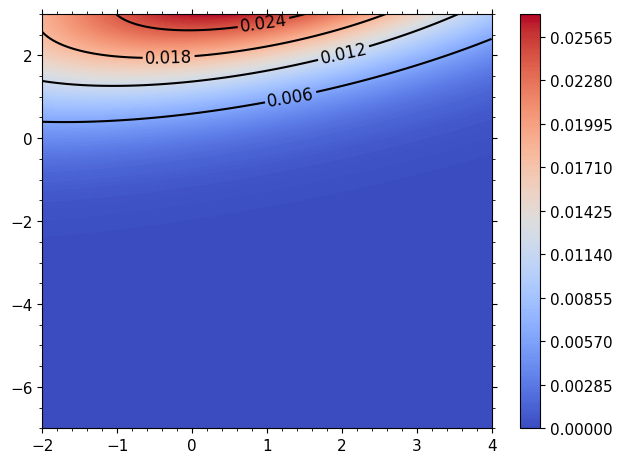

In [20]:
pdf = mvn([mu_1,mu_2],[[sigma_1**2, sigma_1*sigma_2*rho ],[ sigma_1*sigma_2*rho, sigma_2**2]])


# make a grid of points to draw
x = np.linspace(-2,4,200)
y = np.linspace(-7,3,200)
X, Y = np.meshgrid(x,y)
x, y = X.T, Y.T
pos = np.dstack((x,y))

# evaluate grid and plot
z = pdf.pdf(pos)

im = plt.contourf(x, y, z, levels=250, cmap='coolwarm')
cs = plt.contour(x, y, z, levels=4, colors='k')
plt.clabel(cs, cs.levels, inline=True)
plt.colorbar(im)

## Marginal distributions

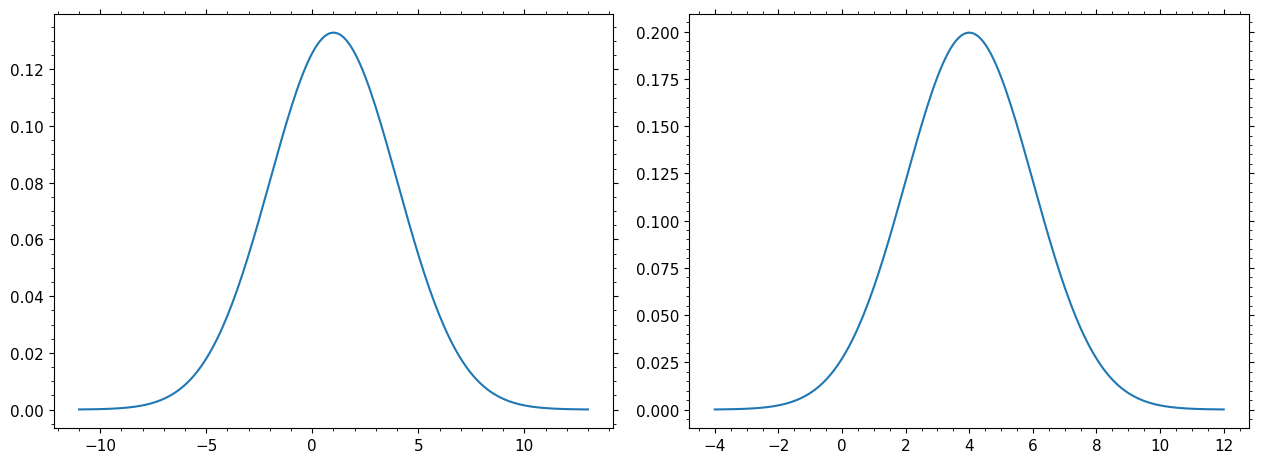

In [21]:
# Marginals
# f(X,Y) --> g(X) = int f(X,Y) dX 
X_marg = norm( mu_1, sigma_1 )
Y_marg = norm( mu_2, sigma_2 )

x = np.linspace(mu_1-4*sigma_1,mu_1+4*sigma_1,200)
y = np.linspace(mu_2-4*sigma_2,mu_2+4*sigma_2,200)
fig, ax = plt.subplots(1,2, figsize=(12.8,4.8))
ax[0].plot(x, X_marg.pdf(x))
ax[1].plot(y, Y_marg.pdf(y))

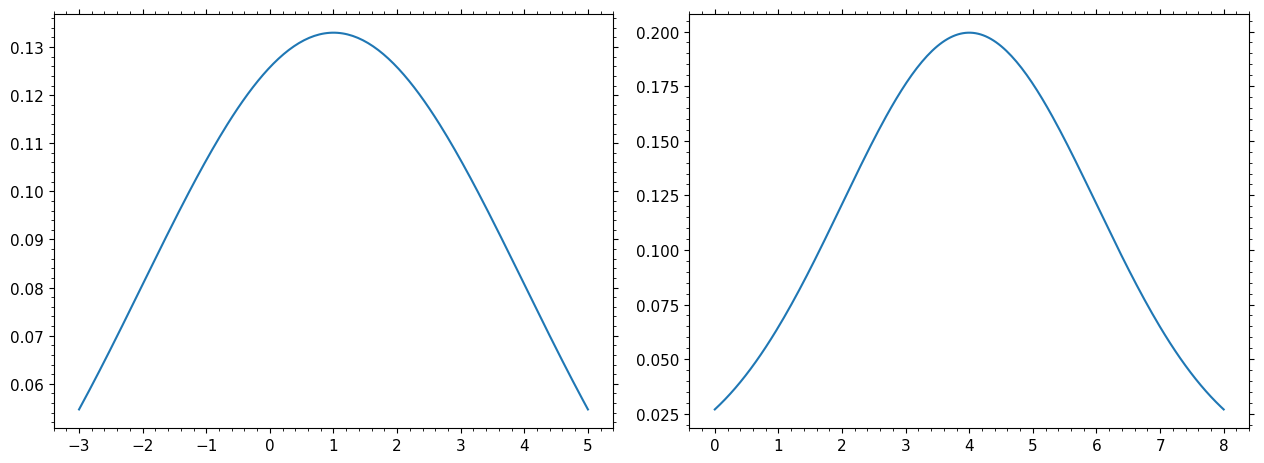

In [22]:
x = np.linspace(mu_1-4,mu_1+4,200)
y = np.linspace(mu_2-4,mu_2+4,200)
fig, ax = plt.subplots(1,2, figsize=(12.8,4.8))
ax[0].plot(x, X_marg.pdf(x))
ax[1].plot(y, Y_marg.pdf(y))

## Conditional distibutions

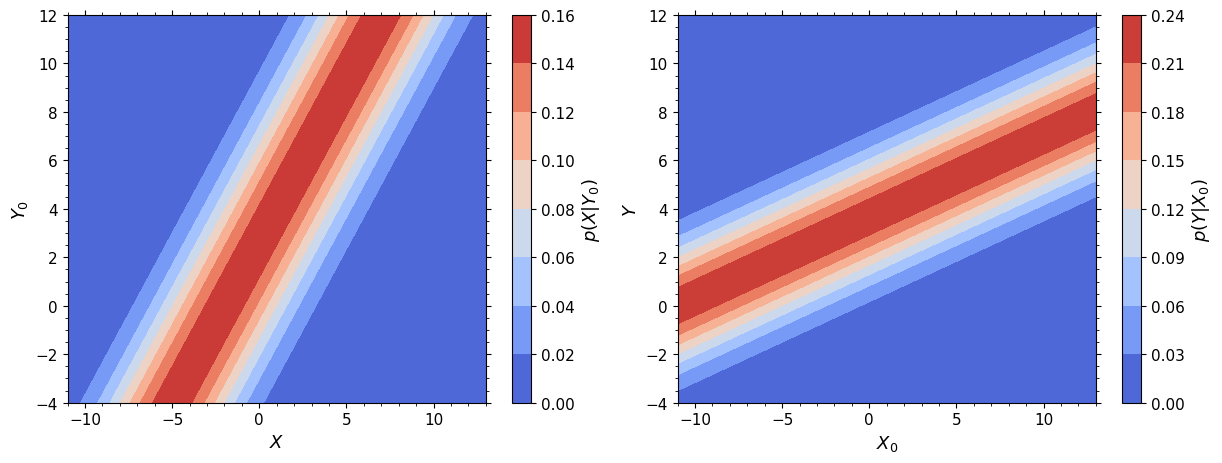

In [23]:
# Conditionals
x = np.linspace(mu_1-4*sigma_1,mu_1+4*sigma_1,200)
y = np.linspace(mu_2-4*sigma_2,mu_2+4*sigma_2,200)
X, Y = np.meshgrid(x,y)
x, y = X.T, Y.T
pos = np.dstack((x,y))

z = pdf.pdf(pos)

z_XgivY = z / Y_marg.pdf( y )
z_YgivX = z / X_marg.pdf( x )

fig, ax = plt.subplots(1, 2, figsize=(12.4, 4.8) )

im = ax[0].contourf( x, y, z_XgivY, cmap='coolwarm' )
cb = fig.colorbar(im, ax=ax[0])
ax[0].set_xlabel('$X$')
ax[0].set_ylabel('$Y_0$')
cb.set_label('$p(X|Y_0)$')

im = ax[1].contourf( x, y, z_YgivX, cmap='coolwarm' )
cb = fig.colorbar(im, ax=ax[1])
ax[1].set_xlabel('$X_0$')
ax[1].set_ylabel('$Y$')
cb.set_label('$p(Y|X_0)$')

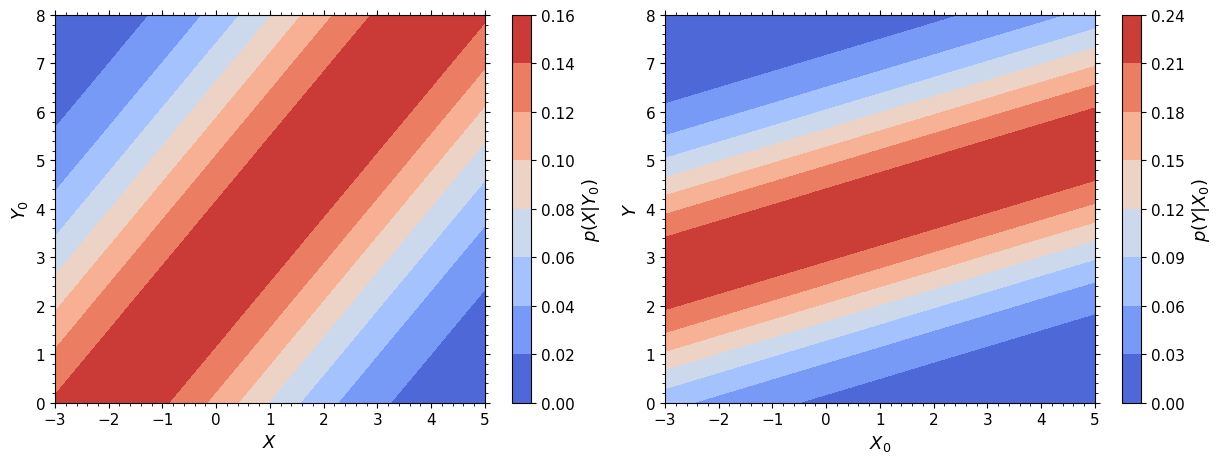

In [24]:
# Conditionals
x = np.linspace(mu_1-4,mu_1+4,200)
y = np.linspace(mu_2-4,mu_2+4,200)
X, Y = np.meshgrid(x,y)
x, y = X.T, Y.T
pos = np.dstack((x,y))

z = pdf.pdf(pos)

z_XgivY = z / Y_marg.pdf( y )
z_YgivX = z / X_marg.pdf( x )

fig, ax = plt.subplots(1, 2, figsize=(12.4, 4.8) )

im = ax[0].contourf( x, y, z_XgivY, cmap='coolwarm' )
cb = fig.colorbar(im, ax=ax[0])
ax[0].set_xlabel('$X$')
ax[0].set_ylabel('$Y_0$')
cb.set_label('$p(X|Y_0)$')

im = ax[1].contourf( x, y, z_YgivX, cmap='coolwarm' )
cb = fig.colorbar(im, ax=ax[1])
ax[1].set_xlabel('$X_0$')
ax[1].set_ylabel('$Y$')
cb.set_label('$p(Y|X_0)$')